# Bayesian analysis and Inference

A drug company would like to introduce a drug to help patients with Alzheimer's. It is desirable to estimate $θ$, the proportion of the market share that this drug will capture. 
- The company interviews 100 people and 15 of them say that they will buy the drug. (This the observed data: n=100, observed=15) $->$ likelihood
- If in the past new drugs tend to capture a proportion between say .10 and .40 of the market, and if all values in between are assumed equally likely, then $θ ∼ Unif(0.10, 0.40)$ $->$ prior

### What is the traceplot of $\theta$ using Bayesian analysis to estimate the market share for the new drug?
- Sample 10000 draws
- Plot the traceplot

In [1]:
import pymc3 as pm
import arviz as az

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


C:\Users\OSHOBOWA\AppData\Roaming\Python\Python38\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta]


Sampling 4 chains for 500 tune and 10_000 draw iterations (2_000 + 40_000 draws total) took 38 seconds.


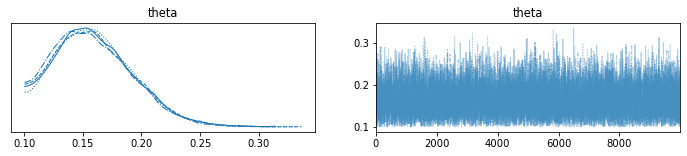

In [2]:
observed = 15
n = 100
with pm.Model() as model:
    
    # Priors for unknown model parameters
    theta = pm.Uniform(name="theta", lower=0.10, upper=0.40)
    
    # Likelihood
    x = pm.Binomial(name="x", p=theta, n=100, observed=observed)

    # Posterior
    # draw 10000 posterior samples
    trace = pm.sample(draws=10000, tune=500, chains=4)
    
    # Plot the trace plot
    az.plot_trace(trace)

Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\OSHOBOWA\AppData\Roaming\Python\Python38\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


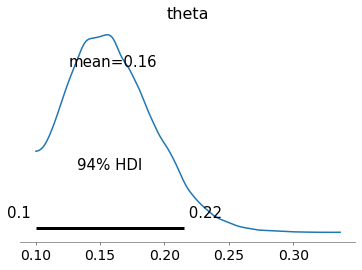

In [3]:
# Plot the posterior of trace
az.plot_posterior(trace);

### Plot the posterior distribution plot of $ \theta $
> - ### The MCMC algorithm has successfully explored the posterior distribution of $\theta$, and the estimate of the market share for the new drug is likely around 0.16.


## Bayesian Network Analysis

In this part we will be analyzing medical diagnosis using Bayes Nets. The structure and the Conditional Probabability Distribution tables are shown in the figure below.

![MedicalDiagnosis](Med-diag-bnet.jpg)

 
- ### Build the Bayes Net, set up the Conditional Probability Distribution tables, and associate the CPDs to the network.   


## Import Libraries

**Import the usual libraries for pandas and plotting, and sklearn.**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics

In [5]:
# import pgmpy
from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import TabularCPD

In [6]:
import sklearn
sklearn.__version__

'0.24.1'

##  **Define the model structure.** 

- Define the network by passing a list of edges.

In [8]:
model = BayesianModel([('Smokes', 'LungDisease'), ('LungDisease', 'ShortnessBreath'), ('LungDisease', 'ChestPain'), ('LungDisease', 'Cough'), ('Cold', 'Cough'), ('Cold', 'Fever')])

C:\ProgramData\Anaconda3\lib\site-packages\pgmpy\models\BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(


##  **Define individual CPDs**
- Define the CPDs using the state names of the variables.  

In [10]:
cpd_Smokes = TabularCPD(variable='Smokes', variable_card=2, values=[[0.2], [0.8]], state_names={'Smokes' : ['T', 'F']})
print(cpd_Smokes)


cpd_LungDisease = TabularCPD(variable='LungDisease', 
                             variable_card=2, 
                             values=[[0.1009, 0.001],
                                     [0.8991, 0.999]],
                             evidence=['Smokes'],
                             evidence_card=[2],
                            state_names={'Smokes' : ['T', 'F'], 'LungDisease' : ['T', 'F']})
print(cpd_LungDisease)



+-----------+-----+
| Smokes(T) | 0.2 |
+-----------+-----+
| Smokes(F) | 0.8 |
+-----------+-----+
+----------------+-----------+-----------+
| Smokes         | Smokes(T) | Smokes(F) |
+----------------+-----------+-----------+
| LungDisease(T) | 0.1009    | 0.001     |
+----------------+-----------+-----------+
| LungDisease(F) | 0.8991    | 0.999     |
+----------------+-----------+-----------+


In [11]:
# Your code
cpd_cold = TabularCPD(variable='Cold', variable_card=2 , values=[[0.02],[0.98]], state_names={"Cold": ["T",'F']})

cpd_shortness_of_breath = TabularCPD(variable='ShortnessBreath', variable_card=2,
                      values=[[0.208,0.01 ], 
                              [0.792, 0.99]],
                      evidence=['LungDisease'], evidence_card=[2],
                      state_names={'ShortnessBreath': ['T', 'F'],
                                   'LungDisease': ['T', 'F']})

cpd_chest_pain = TabularCPD(variable='ChestPain', variable_card=2,
                      values=[[0.208,0.01 ], 
                              [0.792, 0.99]],
                      evidence=['LungDisease'], evidence_card=[2],
                      state_names={'ChestPain': ['T', 'F'],
                                   'LungDisease': ['T', 'F']})

cpd_cough = TabularCPD(variable='Cough', variable_card=2,
                        values=[[0.7525, 0.505, 0.505, 0.01],
                                [0.2475, 0.495, 0.495, 0.99]],
                        evidence=['LungDisease', 'Cold'],
                        evidence_card=[2, 2],
                        state_names={'LungDisease': ['T', 'F'],
                                     'Cold': ['T', 'F'],
                                     'Cough': ['T', 'F']})

cpd_fever = TabularCPD(variable='Fever', variable_card=2,
                      values=[[0.307, 0.01], 
                              [0.693, 0.99]],
                      evidence=['Cold'], evidence_card=[2],
                      state_names={'Fever': ['T', 'F'],
                                   'Cold': ['T', 'F']})

## Check that each of the CPDs are correct

In [12]:
cpd_Smokes

<TabularCPD representing P(Smokes:2) at 0x1e92887b460>

In [13]:
print(cpd_Smokes)

+-----------+-----+
| Smokes(T) | 0.2 |
+-----------+-----+
| Smokes(F) | 0.8 |
+-----------+-----+


In [14]:
# Your code
print(cpd_cold)
print(cpd_shortness_of_breath)
print(cpd_chest_pain)
print(cpd_cough)
print(cpd_fever)

+---------+------+
| Cold(T) | 0.02 |
+---------+------+
| Cold(F) | 0.98 |
+---------+------+
+--------------------+----------------+----------------+
| LungDisease        | LungDisease(T) | LungDisease(F) |
+--------------------+----------------+----------------+
| ShortnessBreath(T) | 0.208          | 0.01           |
+--------------------+----------------+----------------+
| ShortnessBreath(F) | 0.792          | 0.99           |
+--------------------+----------------+----------------+
+--------------+----------------+----------------+
| LungDisease  | LungDisease(T) | LungDisease(F) |
+--------------+----------------+----------------+
| ChestPain(T) | 0.208          | 0.01           |
+--------------+----------------+----------------+
| ChestPain(F) | 0.792          | 0.99           |
+--------------+----------------+----------------+
+-------------+----------------+-----+----------------+----------------+
| LungDisease | LungDisease(T) | ... | LungDisease(F) | LungDisease(F) |
+--

##  Add the defined CPDs to the model (Associate the CPDs with the network)

In [15]:
model.add_cpds(cpd_chest_pain,cpd_cold,cpd_cough,cpd_fever,cpd_LungDisease,cpd_shortness_of_breath,cpd_Smokes)
model.check_model()

True

##  The cardinality of each of the nodes is 2 - True or False?

In [16]:
# Your code
model.get_cpds()

[<TabularCPD representing P(ChestPain:2 | LungDisease:2) at 0x1e928886c40>,
 <TabularCPD representing P(Cold:2) at 0x1e928886c10>,
 <TabularCPD representing P(Cough:2 | LungDisease:2, Cold:2) at 0x1e928886be0>,
 <TabularCPD representing P(Fever:2 | Cold:2) at 0x1e928886c70>,
 <TabularCPD representing P(LungDisease:2 | Smokes:2) at 0x1e92887b490>,
 <TabularCPD representing P(ShortnessBreath:2 | LungDisease:2) at 0x1e928886bb0>,
 <TabularCPD representing P(Smokes:2) at 0x1e92887b460>]

## **Find the probability of each event hapenning using the variable elimination method.**
- $ P(Smokes) $
- $ P(Cold) $
- $ P(LungDisease) $
- $ P(ShortnessBreath) $
- $ P(ChestPain) $
- $ P(Fever) $
- $ P(Cough) $
- $ P(LungDisease|Smokes=True) $
- $ P(LungDisease|Cough=True) $
- $ P(ShortnessBreath|Smokes=True) $
- $ P(ChestPain|Fever=True) $

In [17]:
from pgmpy.inference import VariableElimination
infer = VariableElimination(model)

In [18]:
dist = infer.query(['Smokes'])
print(dist)
# Your code

print(infer.query(['Cold']))
print(infer.query(['LungDisease']))
print(infer.query(['ShortnessBreath']))
print(infer.query(['ChestPain']))
print(infer.query(['Fever']))
print(infer.query(['Cough']))

+-----------+---------------+
| Smokes    |   phi(Smokes) |
+===========+===============+
| Smokes(T) |        0.2000 |
+-----------+---------------+
| Smokes(F) |        0.8000 |
+-----------+---------------+
+---------+-------------+
| Cold    |   phi(Cold) |
+=========+=============+
| Cold(T) |      0.0200 |
+---------+-------------+
| Cold(F) |      0.9800 |
+---------+-------------+
+----------------+--------------------+
| LungDisease    |   phi(LungDisease) |
+================+====================+
| LungDisease(T) |             0.0210 |
+----------------+--------------------+
| LungDisease(F) |             0.9790 |
+----------------+--------------------+
+--------------------+------------------------+
| ShortnessBreath    |   phi(ShortnessBreath) |
+====================+========================+
| ShortnessBreath(T) |                 0.0142 |
+--------------------+------------------------+
| ShortnessBreath(F) |                 0.9858 |
+--------------------+------------------

C:\ProgramData\Anaconda3\lib\site-packages\pgmpy\models\BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(


In [19]:
print(infer.query(['LungDisease'], evidence={'Smokes': 'T'}, show_progress=False))

+----------------+--------------------+
| LungDisease    |   phi(LungDisease) |
+================+====================+
| LungDisease(T) |             0.1009 |
+----------------+--------------------+
| LungDisease(F) |             0.8991 |
+----------------+--------------------+


In [20]:
print(infer.query(['LungDisease'], evidence={'Cough': 'T'}, show_progress=False))

+----------------+--------------------+
| LungDisease    |   phi(LungDisease) |
+================+====================+
| LungDisease(T) |             0.3545 |
+----------------+--------------------+
| LungDisease(F) |             0.6455 |
+----------------+--------------------+


In [21]:
print(infer.query(['ShortnessBreath'], evidence={'Smokes': 'T'}, show_progress=False))

+--------------------+------------------------+
| ShortnessBreath    |   phi(ShortnessBreath) |
+====================+========================+
| ShortnessBreath(T) |                 0.0300 |
+--------------------+------------------------+
| ShortnessBreath(F) |                 0.9700 |
+--------------------+------------------------+


In [22]:
print(infer.query(['ChestPain'], evidence={'Fever': 'T'}, show_progress=False))

+--------------+------------------+
| ChestPain    |   phi(ChestPain) |
+==============+==================+
| ChestPain(T) |           0.0142 |
+--------------+------------------+
| ChestPain(F) |           0.9858 |
+--------------+------------------+



## **Are the following  true? If not, can you make them independent by including info on the parent?**
1. Cough is independent from Fever. (Having knowledge about Fever does not change the probability of Cough) 
2. Fever is independent from Smokes. 
3. ChestPain is independent from Smokes.
4. ChestPain is independent from Smokes given LungDisease.


#### 1. Cough is independent from Fever

In [28]:
dist = infer.query(['Cough'])
print(dist)

dist = infer.query(['Cough'], evidence={'Fever':'T'})
print(dist)

dist = infer.query(['Cough'], evidence={'Fever':'F'})
print(dist)

+----------+--------------+
| Cough    |   phi(Cough) |
+==========+==============+
| Cough(T) |       0.0302 |
+----------+--------------+
| Cough(F) |       0.9698 |
+----------+--------------+
+----------+--------------+
| Cough    |   phi(Cough) |
+==========+==============+
| Cough(T) |       0.2091 |
+----------+--------------+
| Cough(F) |       0.7909 |
+----------+--------------+
+----------+--------------+
| Cough    |   phi(Cough) |
+==========+==============+
| Cough(T) |       0.0273 |
+----------+--------------+
| Cough(F) |       0.9727 |
+----------+--------------+


> - Fever does affect Cough -> Not independent
> - However, given the parent of both Fever and Cough (Cold), they should be independent.

In [29]:
dist = infer.query(['Cough'], evidence={'Cold':'F', 'Fever':'T'})
print(dist)

dist = infer.query(['Cough'], evidence={'Cold':'F', 'Fever':'F'})
print(dist)

dist = infer.query(['Cough'], evidence={'Cold':'T', 'Fever':'T'})
print(dist)

dist = infer.query(['Cough'], evidence={'Cold':'T', 'Fever':'F'})
print(dist)

+----------+--------------+
| Cough    |   phi(Cough) |
+==========+==============+
| Cough(T) |       0.0204 |
+----------+--------------+
| Cough(F) |       0.9796 |
+----------+--------------+
+----------+--------------+
| Cough    |   phi(Cough) |
+==========+==============+
| Cough(T) |       0.0204 |
+----------+--------------+
| Cough(F) |       0.9796 |
+----------+--------------+
+----------+--------------+
| Cough    |   phi(Cough) |
+==========+==============+
| Cough(T) |       0.5102 |
+----------+--------------+
| Cough(F) |       0.4898 |
+----------+--------------+
+----------+--------------+
| Cough    |   phi(Cough) |
+==========+==============+
| Cough(T) |       0.5102 |
+----------+--------------+
| Cough(F) |       0.4898 |
+----------+--------------+


#### 2. Fever is independent from Smokes. 

In [23]:
# Your code
dist = infer.query(['Fever'])
print(dist)

dist = infer.query(['Fever'], evidence={'Smokes':'T'})
print(dist)

dist = infer.query(['Fever'], evidence={'Smokes':'F'})
print(dist)

+----------+--------------+
| Fever    |   phi(Fever) |
+==========+==============+
| Fever(T) |       0.0159 |
+----------+--------------+
| Fever(F) |       0.9841 |
+----------+--------------+
+----------+--------------+
| Fever    |   phi(Fever) |
+==========+==============+
| Fever(T) |       0.0159 |
+----------+--------------+
| Fever(F) |       0.9841 |
+----------+--------------+
+----------+--------------+
| Fever    |   phi(Fever) |
+==========+==============+
| Fever(T) |       0.0159 |
+----------+--------------+
| Fever(F) |       0.9841 |
+----------+--------------+


> ### - Smokes does not affect Fever **Independent**

#### 3. ChestPain is independent from Smokes.

In [24]:
# Your code
# Your code
dist = infer.query(['ChestPain'])
print(dist)

dist = infer.query(['ChestPain'], evidence={'Smokes':'T'})
print(dist)

dist = infer.query(['ChestPain'], evidence={'Smokes':'F'})
print(dist)

+--------------+------------------+
| ChestPain    |   phi(ChestPain) |
+==============+==================+
| ChestPain(T) |           0.0142 |
+--------------+------------------+
| ChestPain(F) |           0.9858 |
+--------------+------------------+
+--------------+------------------+
| ChestPain    |   phi(ChestPain) |
+==============+==================+
| ChestPain(T) |           0.0300 |
+--------------+------------------+
| ChestPain(F) |           0.9700 |
+--------------+------------------+
+--------------+------------------+
| ChestPain    |   phi(ChestPain) |
+==============+==================+
| ChestPain(T) |           0.0102 |
+--------------+------------------+
| ChestPain(F) |           0.9898 |
+--------------+------------------+


> ### - Smokes does affect Chestpain -> **Not Independent**

#####  4. ChestPain is independent from Smokes given LungDisease.

In [25]:
# Your code
# Your code
dist = infer.query(['ChestPain'])
print(dist)

dist = infer.query(['ChestPain'], evidence={'Smokes':'T','LungDisease':'T'})
print(dist)

dist = infer.query(['ChestPain'], evidence={'Smokes':'F','LungDisease':'T'})
print(dist)

+--------------+------------------+
| ChestPain    |   phi(ChestPain) |
+==============+==================+
| ChestPain(T) |           0.0142 |
+--------------+------------------+
| ChestPain(F) |           0.9858 |
+--------------+------------------+
+--------------+------------------+
| ChestPain    |   phi(ChestPain) |
+==============+==================+
| ChestPain(T) |           0.2080 |
+--------------+------------------+
| ChestPain(F) |           0.7920 |
+--------------+------------------+
+--------------+------------------+
| ChestPain    |   phi(ChestPain) |
+==============+==================+
| ChestPain(T) |           0.2080 |
+--------------+------------------+
| ChestPain(F) |           0.7920 |
+--------------+------------------+


> ### - Chestpain is not independent from smokes given lungdisease

## More analysis
1. Does having the knowledge that the person is coughing increase the probability of lung disease?
2. Does having the knowledge that the person is coughing increase the probability that the person has Cold?
3. Does having the knowledge that the person is coughing increase the probability that there is Fever?
4. Does having the knowledge that the person is coughing increase the probability that there is Fever, given the person has Cold?
5. Does having the knowledge that the person has Fever increase the probability that there is Lung Disease?


#### 1. Does having the knowledge that the person is coughing increase the probability of lung disease? [5]

In [26]:
dist = infer.query(['LungDisease'])
print(dist)
dist = infer.query(['LungDisease'], evidence={'Cough': 'T'})
print(dist)

+----------------+--------------------+
| LungDisease    |   phi(LungDisease) |
+================+====================+
| LungDisease(T) |             0.0210 |
+----------------+--------------------+
| LungDisease(F) |             0.9790 |
+----------------+--------------------+
+----------------+--------------------+
| LungDisease    |   phi(LungDisease) |
+================+====================+
| LungDisease(T) |             0.3545 |
+----------------+--------------------+
| LungDisease(F) |             0.6455 |
+----------------+--------------------+


> ##### - Having the knowledge that the person is coughing increases the probability of lung disease.

#### 2. Does having the knowledge that the person is coughing increase the probability that the person has Cold? [5]

In [27]:
# Your code
dist = infer.query(['Cold'])
print(dist)
dist = infer.query(['Cold'], evidence={'Cough': 'T'})
print(dist)

+---------+-------------+
| Cold    |   phi(Cold) |
+=========+=============+
| Cold(T) |      0.0200 |
+---------+-------------+
| Cold(F) |      0.9800 |
+---------+-------------+
+---------+-------------+
| Cold    |   phi(Cold) |
+=========+=============+
| Cold(T) |      0.3381 |
+---------+-------------+
| Cold(F) |      0.6619 |
+---------+-------------+


> ##### - Having the knowledge that the person is coughing increases the probability of Cold.

##### 3. Does having the knowledge that the person is coughing increase the probability that there is Fever? [5]

In [30]:
# Your code
# Your code
dist = infer.query(['Fever'])
print(dist)
dist = infer.query(['Fever'], evidence={'Cough': 'T'})
print(dist)

+----------+--------------+
| Fever    |   phi(Fever) |
+==========+==============+
| Fever(T) |       0.0159 |
+----------+--------------+
| Fever(F) |       0.9841 |
+----------+--------------+
+----------+--------------+
| Fever    |   phi(Fever) |
+==========+==============+
| Fever(T) |       0.1104 |
+----------+--------------+
| Fever(F) |       0.8896 |
+----------+--------------+


> ##### - Having the knowledge that the person is coughing increases the probability of FEVER.

#### 4. Does having the knowledge that the person is coughing increase the probability that there is Fever, given the person has Cold?

In [31]:
# Your code
# Your code
# Your code
dist = infer.query(['Fever'])
print(dist)
dist = infer.query(['Fever'], evidence={'Cough': 'T','Cold':'T'})
print(dist)

+----------+--------------+
| Fever    |   phi(Fever) |
+==========+==============+
| Fever(T) |       0.0159 |
+----------+--------------+
| Fever(F) |       0.9841 |
+----------+--------------+
+----------+--------------+
| Fever    |   phi(Fever) |
+==========+==============+
| Fever(T) |       0.3070 |
+----------+--------------+
| Fever(F) |       0.6930 |
+----------+--------------+


> ##### - Having the knowledge that the person is coughing increases the probability of FEVER, given the person has cold.

##### 5. Does having the knowledge that the person has Fever increase the probability that there is Lung Disease?

In [32]:
# Your code
dist = infer.query(['LungDisease'])
print(dist)
dist = infer.query(['LungDisease'], evidence={'Fever': 'T'})
print(dist)

+----------------+--------------------+
| LungDisease    |   phi(LungDisease) |
+================+====================+
| LungDisease(T) |             0.0210 |
+----------------+--------------------+
| LungDisease(F) |             0.9790 |
+----------------+--------------------+
+----------------+--------------------+
| LungDisease    |   phi(LungDisease) |
+================+====================+
| LungDisease(T) |             0.0210 |
+----------------+--------------------+
| LungDisease(F) |             0.9790 |
+----------------+--------------------+


> ##### - Having the knowledge that the person has fever does not affect  the probability of Lung Disease.

## Understanding State of Cough
1. What's the most probable state of Cough? 
2. What's the most probable state of Cough given Cold is True? 
3. What's the most probable state of Cough given Cold is True and Lung Disease is True?

#### 1. What's the most probable state of Cough? 

In [33]:
infer.map_query(['Cough'])

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

{'Cough': 'F'}

> ##### -The most probable state of Cough is False.

##### 2. What's the most probable state of Cough given Cold is True? 

In [34]:
# Your code
infer.map_query(['Cough'],  evidence={'Cold': 'T'})

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

{'Cough': 'T'}

> ##### -The most probable state of Cough is True given Cold is True.

##### 3. What's the most probable state of Cough given Cold is True and Lung Disease is True?

In [36]:
# Your code
# Your code
infer.map_query(['Cough'],  evidence={'Cold': 'T', 'LungDisease': 'T'})

0it [00:00, ?it/s]

0it [00:00, ?it/s]

{'Cough': 'T'}

> ##### -The most probable state of Cough is **True** given Cold is true and Lung Disease is true.